# Initialization


## Importing the libraries

In [338]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

## Loading the data

In [339]:
dropout = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/dropout.xls")
enrollments = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/enrollment.xls")
drinks = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/drinking_water.xls")
computers = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/computers.xls")
electricity = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/electricity.xls")
boys_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/boys_toilet.xls")
girls_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/girls_toilet.xls")

# Data preparation

In [340]:
def returner(xx):
    x=[]
    for i in range(36):
        x.append(xx[['State','All Schools']].loc[3*i])  
    x=pd.DataFrame(x)
    x.set_index('State', inplace=True)
    return x

In [341]:
enrollments['Higher_Secondary_Boys']=enrollments['Higher_Secondary_Boys'].astype('float')
enrollments['Higher_Secondary_Girls']=enrollments['Higher_Secondary_Girls'].astype('int')
enrollments['Higher_Secondary_Total']=enrollments['Higher_Secondary_Total'].astype('int')   
drinks=returner(drinks)
drinks.columns=['Drinking water']
electricity=returner(electricity)
electricity.columns=['Electricity']
computers=returner(computers)
computers.columns=["Computer"]
boys_t=returner(boys_toilet)
boys_t.columns=['Boys toilet']
girls_t=returner(girls_toilet)
girls_t.columns=['Girls toilet']
factors=pd.concat([drinks,electricity,computers,boys_t,girls_t],axis=1)
factors.reset_index(inplace=True)

In [342]:
states=[]
for i in range(36):
    states.append(dropout.State.iloc[3*i])
states=pd.DataFrame(states, columns=['State'])

def create_aggregate(inp):
    inp.drop(['State','Year'],axis=1,inplace=True)

    x=pd.DataFrame()
    for i in range(36):
        x[i]=inp.iloc[3*i+0:i*3+3,:].mean()
    x=x.transpose() 
    return x

In [343]:
dropouts_x = create_aggregate(dropout)
enrollments_x=create_aggregate(enrollments)

# Data exploration

In [344]:
print("\n Correlation between enrollment rates at different stages of schooling\n")
enrollments[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']].corr(method='spearman').style.background_gradient(cmap='coolwarm')


 Correlation between enrollment rates at different stages of schooling



,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
Primary_Total,1.000000,0.691324,0.122769,-0.216003
Upper_Primary_Total,0.691324,1.000000,0.513059,0.076870
Secondary_Total,0.122769,0.513059,1.000000,0.659823
Higher_Secondary_Total,-0.216003,0.076870,0.659823,1.000000


### Observations
* There is moderate positive correlation between `primary` and `upper primary` dropouts
* There is moderate positive correlation between `secondary` and `higher secondary` dropouts

Probably in similar states students dropout during the lower classes, and in other similar states the dropout rate is higher in the upper classes.

In [345]:
print("\n Correlation between dropout rates at different stages of schooling\n")
dropout[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']].corr(method='spearman').style.background_gradient(cmap='coolwarm')


 Correlation between dropout rates at different stages of schooling



,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
PRIMARY_TOTAL,1.000000,0.748033,0.384132,-0.255152
UPPER_PRIMARY_TOTAL,0.748033,1.000000,0.605983,-0.144547
SECONDARY_TOTAL,0.384132,0.605983,1.000000,-0.183079
HRSECONDARY_TOTAL,-0.255152,-0.144547,-0.183079,1.000000


### Observations

* Dropouts in `primary` and `upper primary` are positively correlated. We need to do further analysis.

Text(0.5, 0.98, 'Analysis on dropout and enrollment rates')

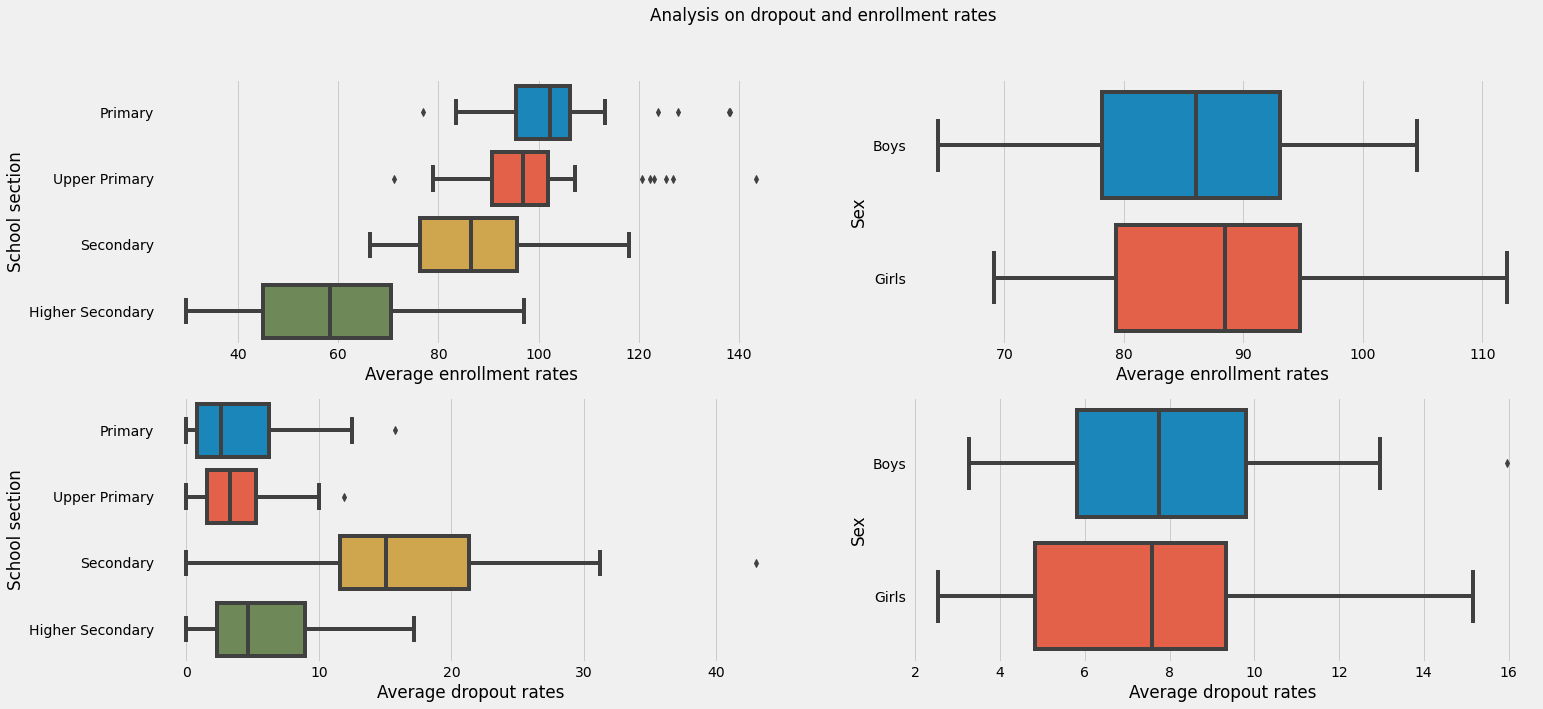

In [346]:
prim=['Primary']*36
uprim=['Upper Primary']*36
sec=['Secondary']*36
usec=['Higher Secondary']*36
lis=prim+uprim+sec+usec
lis
datas=pd.DataFrame({'values':pd.concat([enrollments_x['Primary_Total'],enrollments_x['Upper_Primary_Total'],enrollments_x['Secondary_Total'],enrollments_x['Higher_Secondary_Total']],axis=0), 'ID':lis})

enrollments_boys=(enrollments_x['Primary_Boys']+enrollments_x['Upper_Primary_Boys']+enrollments_x['Secondary_Boys']+enrollments_x['Higher_Secondary_Boys'])/4
enrollments_girls=(enrollments_x['Primary_Girls']+enrollments_x['Upper_Primary_Girls']+enrollments_x['Secondary_Girls']+enrollments_x['Higher_Secondary_Girls'])/4
boys=['Boys']*36
girls=['Girls']*36
sex=boys+girls
enrolls=pd.concat([enrollments_boys,enrollments_girls],axis=0)
datassex1=pd.DataFrame({'Enrollments':enrolls,'Sex':sex})


datass=pd.DataFrame({'values':pd.concat([dropouts_x['PRIMARY_TOTAL'],dropouts_x['UPPER_PRIMARY_TOTAL'],dropouts_x['SECONDARY_TOTAL'],dropouts_x['HRSECONDARY_TOTAL']],axis=0), 'ID':lis})

dropouts_boys=(dropouts_x['PRIMARY_BOYS']+dropouts_x['UPPER_PRIMARY_BOYS']+dropouts_x['SECONDARY_BOYS']+dropouts_x['HRSECONDARY_BOYS'])/4
dropouts_girls=(dropouts_x['PRIMARY_GIRLS']+dropouts_x['UPPER_PRIMARY_GIRLS']+dropouts_x['SECONDARY_GIRLS']+dropouts_x['HRSECONDARY_GIRLS'])/4

drops=pd.concat([dropouts_boys,dropouts_girls],axis=0)
datassex2=pd.DataFrame({'Dropouts':drops,'Sex':sex})

fig,ax=plt.subplots(2,2,figsize=(22,10))

sns.boxplot(x='values',y='ID',data=datas,ax=ax[0,0])
ax[0,0].set_xlabel('Average enrollment rates')
ax[0,0].set_ylabel('School section')
#ax[0].suptitle('Comparison of enrollment rates across different sections of the school')

sns.boxplot(x='Enrollments',y='Sex',data=datassex1,ax=ax[0,1])
ax[0,1].set_xlabel('Average enrollment rates')
ax[0,1].set_ylabel('Sex')
#ax[1].suptitle('Comparison of enrollment rates across sex')

sns.boxplot(x='values',y='ID',data=datass,ax=ax[1,0])
ax[1,0].set_xlabel('Average dropout rates')
ax[1,0].set_ylabel('School section')
#plt.title('Comparison of dropout rates across different sections of the school')


sns.boxplot(x='Dropouts',y='Sex',data=datassex2,ax=ax[1,1])
ax[1,1].set_xlabel('Average dropout rates')
ax[1,1].set_ylabel('Sex')

plt.suptitle("Analysis on dropout and enrollment rates")

# Do these box plots using plotly so that the outliers can be understood by clicking on them

In [347]:
factors.corr(method='spearman').style.background_gradient(cmap="coolwarm")

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Drinking water,1.000000,0.865238,0.748390,0.696139,0.636747
Electricity,0.865238,1.000000,0.878351,0.642424,0.704691
Computer,0.748390,0.878351,1.000000,0.648551,0.690509
Boys toilet,0.696139,0.642424,0.648551,1.000000,0.874460
Girls toilet,0.636747,0.704691,0.690509,0.874460,1.000000


### Observations

* `Boys toilet` and `girls toilet` are correlated. We need to test whether the percentage of boys toilets in schools and percentage of girls toilets in schools is significantly different. Let us design the hypothesis.

Text(0.5, 1.0, 'Comparison of prescence of different factors in the school')

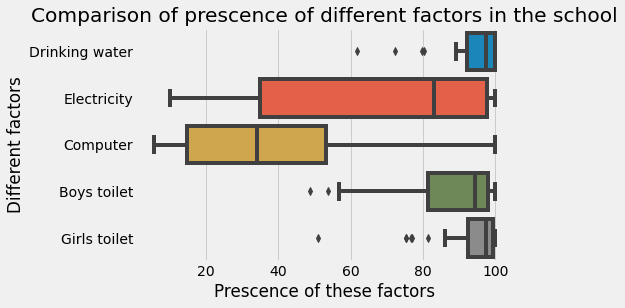

In [348]:
prim=['Drinking water']*36
uprim=['Electricity']*36
uuprim=['Computer']*36
sec=['Boys toilet']*36
usec=['Girls toilet']*36
lis=prim+uprim+uuprim+sec+usec
lis
datas=pd.DataFrame({'values':pd.concat([factors['Drinking water'],factors['Electricity'],factors['Computer'],factors['Boys toilet'], factors['Girls toilet']],axis=0), 'ID':lis})
sns.boxplot(x='values',y='ID',data=datas)
plt.xlabel('Prescence of these factors')
plt.ylabel('Different factors')
plt.title('Comparison of prescence of different factors in the school')

## Clustering

In [349]:
def create_clusters(inx):

    scores=[]
    for i in range(2,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(inx)
        label=KMeans.predict(k,inx)
        scores.append(silhouette_score(inx, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores)+2

    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(inx)
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],inx,lab['Labels']],axis=1)
    return result

In [350]:
def return_clusters(result):
    grouping=result[['State','Labels']]
    clusters=pd.DataFrame()
    for l in grouping.Labels.unique():
        clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l}").to_frame()],axis=1)
    clusters.replace({np.nan:'-'},inplace=True)
    clusters.sort_index(axis=1, inplace=True)    
    return clusters

# Hypothesis testing

## Dropouts

## Enrollments

## Other factors

# Analysis

In [351]:
dropouts_x=dropouts_x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']]

In [352]:
enrollments_x=enrollments_x[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']]

In [353]:
factors.drop(['State'],axis=1,inplace=True)

In [354]:
dataset=pd.concat([dropouts_x,enrollments_x,factors],axis=1)
cols=[]
for col in dataset.columns[:4]:
    cols.append("Dropout-"+col[:-6])
for col in dataset.columns[4:8]:
    cols.append("Enrollments-"+col[:-6])
for col in dataset.columns[8:]:
    cols.append(col)  
dataset.columns=cols

In [355]:
dataset.head(5)

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Dropout-HRSECONDARY,Enrollments-Primary,Enrollments-Upper_Primary,Enrollments-Secondary,Enrollments-Higher_Secondary,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
0,0.800000,1.143333,7.543333,15.646667,91.260000,87.863333,93.243333,90.000000,98.69,88.86,53.06,94.52,93.44
1,4.750000,4.113333,13.693333,4.046667,89.810000,81.456667,74.370000,57.000000,90.35,90.34,29.57,56.88,81.31
2,12.290000,6.590000,14.843333,13.533333,127.783333,122.200000,89.300000,64.666667,79.79,36.35,24.28,48.73,76.90
3,9.680000,8.253333,28.086667,3.976667,111.500000,94.013333,74.526667,34.333333,80.30,19.39,8.85,60.17,75.28
4,0.696667,2.353333,27.123333,0.000000,102.240000,97.733333,69.180000,29.666667,92.53,9.96,5.47,73.42,75.41


In [356]:
dataset.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Dropout-HRSECONDARY,Enrollments-Primary,Enrollments-Upper_Primary,Enrollments-Secondary,Enrollments-Higher_Secondary,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Dropout-PRIMARY,1.000000,0.808626,0.433988,-0.326441,0.546122,0.140328,-0.348632,-0.430200,-0.798247,-0.718789,-0.614355,-0.535910,-0.429225
Dropout-UPPER_PRIMARY,0.808626,1.000000,0.684685,-0.245976,0.491634,0.171943,-0.469755,-0.650274,-0.640407,-0.595619,-0.549292,-0.590341,-0.480315
Dropout-SECONDARY,0.433988,0.684685,1.000000,-0.314359,0.302703,0.020849,-0.551866,-0.945864,-0.444591,-0.543557,-0.556757,-0.462975,-0.415749
Dropout-HRSECONDARY,-0.326441,-0.245976,-0.314359,1.000000,-0.139472,0.096330,0.235673,0.276393,0.256948,0.451580,0.497875,0.235696,0.301116
Enrollments-Primary,0.546122,0.491634,0.302703,-0.139472,1.000000,0.725354,0.090862,-0.209076,-0.586416,-0.481959,-0.426512,-0.408371,-0.275276
Enrollments-Upper_Primary,0.140328,0.171943,0.020849,0.096330,0.725354,1.000000,0.461776,0.069520,-0.280033,-0.148969,-0.129215,-0.148616,0.032863
Enrollments-Secondary,-0.348632,-0.469755,-0.551866,0.235673,0.090862,0.461776,1.000000,0.695333,0.330924,0.456444,0.456628,0.259627,0.428636
Enrollments-Higher_Secondary,-0.430200,-0.650274,-0.945864,0.276393,-0.209076,0.069520,0.695333,1.000000,0.442021,0.524396,0.553717,0.373720,0.382429
Drinking water,-0.798247,-0.640407,-0.444591,0.256948,-0.586416,-0.280033,0.330924,0.442021,1.000000,0.865238,0.748390,0.696139,0.636747
Electricity,-0.718789,-0.595619,-0.543557,0.451580,-0.481959,-0.148969,0.456444,0.524396,0.865238,1.000000,0.878351,0.642424,0.704691


### Observations

* Dropouts are negatively correlated with factors. Children need more care. They need drinking water because they play a lot. If there isn't electricity, India primarily being a tropical country,discourage them to come to schools. WRITE BETTER AND FOR THE OTHER POINTS
* Correlation with dropouts reduces with increasing age of students
* Same thing observed in enrollments

# Test hypothesis by testing with two samples from upper and lower samples

## Checking feature importance

In [357]:
#Using SVD

vals=np.array(dataset)
u,sig,v_t=np.linalg.svd(vals)
feature_imp=pd.Series(sig,index=list(dataset.columns))
feature_imp.index.name="Feature"
feature_imp.name="Explained variance"
var_exp=pd.DataFrame(feature_imp)
tot=var_exp['Explained variance'].sum()
var_exp['Explained variance'] = var_exp['Explained variance']/tot*100
var_exp.sort_values(['Explained variance'],ascending=False,inplace=True)

exp_var=[]
for i in range(1,var_exp.shape[0]+1):
    exp_var.append(var_exp['Explained variance'].iloc[0:i].sum())
pd.concat([var_exp,pd.DataFrame(exp_var,index=var_exp.index, columns=['Cumulative explained variance'])],axis=1)

,Explained variance,Cumulative explained variance
Feature,,
Dropout-PRIMARY,67.467485,67.467485
Dropout-UPPER_PRIMARY,10.564140,78.031625
Dropout-SECONDARY,4.784083,82.815709
Dropout-HRSECONDARY,4.027713,86.843422
Enrollments-Primary,3.904819,90.748241
Enrollments-Upper_Primary,2.150093,92.898334
Enrollments-Secondary,1.967697,94.866031
Enrollments-Higher_Secondary,1.378449,96.244480
Drinking water,1.288027,97.532508


In [358]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
dataset=pd.DataFrame(mm.fit_transform(dataset),columns=list(dataset.columns))

# Overall ranking of states

In [362]:
states['Overall score']=dataset.mean(axis=1)

states.set_index('State').sort_values(['Overall score'],ascending=False) 

,Overall score
State,
Delhi,0.689531
Mizoram,0.651740
Sikkim,0.647587
Lakshadweep,0.600114
Chandigarh,0.580263
Manipur,0.574625
Puducherry,0.571594
Himachal Pradesh,0.569865
Goa,0.565119


# Finding out outliers

c:\Users\ADMIN\Documents\Codebase\envs\machine_L\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.25, 0.2, 'Bihar')

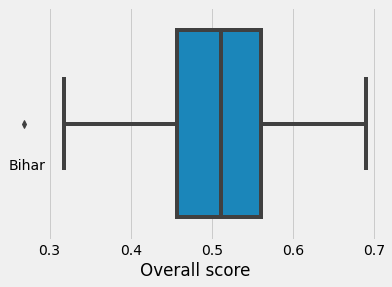

In [363]:
sns.boxplot(states['Overall score'])
plt.text(0.25,0.2,s=states.iloc[states['Overall score'].argmin()][0])

## Visualizing the data on the basis of top three features

In [361]:
import plotly.express as px
fig = px.scatter_3d(clusters, y='Dropout-PRIMARY', z='Dropout-UPPER_PRIMARY', x='Dropout-SECONDARY', opacity=0.7,text='State')
fig.update_layout(width=1200, height=720)